# pandas 

**김우정**

현재 0.19.1버전 [[documentation]](http://pandas.pydata.org/pandas-docs/stable/)

**pandas** 는 **관계형** 또는 **레이블이있는** 데이터 작업을 쉽고 직관적으로 처리 할 수 있도록 설계된 빠르고 유연하며 표현이 풍부한 데이터 구조를 제공하는 Python 패키지

**pandas**는 다양한 종류의 데이터에 적합합니다.
- SQL 테이블 또는 Excel 스프레드 시트에서와 같이 이질적으로 유형이 지정된 열이있는 테이블 형식 데이터
- 정렬되고 정렬되지 않은 (반드시 고정 주파수 일 필요는 없음) 시계열 데이터.
- 행 및 열 레이블이 포함 된 임의의 행렬 데이터 (균질 유형 또는 이종 유형)
- 다른 형태의 관찰 / 통계 데이터 세트. (데이터는 실제로 pandas 데이터 구조에 배치되기 위해 전혀 레이블링 될 필요가 없습니다)


**pandas**의 장점
- 부동 소수점 데이터뿐만 아니라 **누락 된 데이터** (NaN으로 표현됨)를 손쉽게 처리
- 크기 변경 : DataFrame 및 상위 차원 개체에서 열을 **삽입하고 삭제**할 수 있습니다.
- 자동 및 명시 적 데이터 정렬 : 개체를 레이블 세트에 명시 적으로 정렬하거나 사용자가 레이블을 무시하고 Series, DataFrame 등으로 자동으로 데이터를 계산에 사용할 수 있습니다.
- 데이터를 집계 및 변환하기 위해 데이터 세트에 분할 적용 적용 작업을 수행하는 강력하고 유연한 그룹 별(**group by**) 기능
- 다른 Python 및 NumPy 데이터 구조의 비정형 색인 데이터를 DataFrame 객체로 쉽게 변환 할 수 있습니다.
- 지능형 레이블 기반 슬라이싱, 고급 인덱싱 및 대용량 데이터 세트의 하위 집합
- 직관적 인 데이터 병합(**merge**) 및 결합(**join**)
- 데이터 세트의 유연한 재형성
- 축의 계층 적 레이블링 (틱당 다중 레이블을 가질 수 있음)
- 플랫 파일 (CSV 및 구분), Excel 파일, 데이터베이스 및 초고속 HDF5 형식의 저장 /로드 데이터에서 데이터를로드하기위한 강력한 IO 도구
- 시계열 관련 기능 : 날짜 범위 생성 및 빈도 변환, 창 이동 통계, 창 선형 회귀 이동, 날짜 이동 및 지연 등

pandas의 자료타입
- 1차원 데이터 array
- 2차원 데이터 dataframe
- 3차원 데이터 Panel



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# 1 파일 읽어오기
## cvs파일에서 data를 읽어오기

캐나다 몬트리올의 사이클리스트 데이터를 사용합니다. [사이트](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage)에서 다운 받을 수 있으며 데이터셋은 몬트리올에있는 7개의 자전거도로 이용데이터 입니다. :)

In [2]:
# 일단 원본데이터를 구경해봅니다
pd.read_csv('bikes.csv').head()

,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
0,01/01/2012,35,NaN,0,38,51,26,10,16,NaN
1,02/01/2012,83,NaN,1,68,153,53,6,43,NaN
2,03/01/2012,135,NaN,2,104,248,89,3,58,NaN
3,04/01/2012,144,NaN,1,116,318,111,8,61,NaN
4,05/01/2012,197,NaN,2,124,330,97,13,95,NaN


In [3]:
fixed_df = pd.read_csv('bikes.csv', sep=',', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df.head()
#역명을 index로 잡는다

,Berri 1,BrÃ©beuf (donnÃ©es non disponibles),CÃ´te-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (donnÃ©es non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


## 데이터 대략적으로 살펴보기
cvs 파일을 읽을 때 행과 열로 이루어진 DataFrame로 읽게 됩니다. 본격적으로 데이터를 보기전에 데이터를 대략적으로 살펴봅니다.

head, info, describe함수를 사용합니다.

- head 5개 행의 데이터를 보여줍니다.
- info 간결한 데이터의 요약을 보여줍니다.
- describe NaN값을 제외한 간략한 통계를 보여줍니다.

In [4]:
fixed_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 310 entries, 2012-01-01 to 2012-11-05
Data columns (total 9 columns):
Berri 1                                 310 non-null int64
BrÃ©beuf (donnÃ©es non disponibles)     0 non-null float64
CÃ´te-Sainte-Catherine                  310 non-null int64
Maisonneuve 1                           310 non-null int64
Maisonneuve 2                           310 non-null int64
du Parc                                 310 non-null int64
Pierre-Dupuy                            310 non-null int64
Rachel1                                 310 non-null int64
St-Urbain (donnÃ©es non disponibles)    0 non-null float64
dtypes: float64(2), int64(7)
memory usage: 24.2 KB


In [5]:
fixed_df.describe()

,Berri 1,BrÃ©beuf (donnÃ©es non disponibles),CÃ´te-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (donnÃ©es non disponibles)
count,310.000000,0.0,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,0.0
mean,2985.048387,NaN,1233.351613,1983.325806,3510.261290,1862.983871,1054.306452,2873.483871,NaN
std,2169.271062,NaN,944.643188,1450.715170,2484.959789,1332.543266,1064.029205,2039.315504,NaN
min,32.000000,NaN,0.000000,33.000000,47.000000,18.000000,0.000000,0.000000,NaN
25%,596.000000,NaN,243.250000,427.000000,831.000000,474.750000,53.250000,731.000000,NaN
50%,3128.000000,NaN,1269.000000,2019.500000,3688.500000,1822.500000,704.000000,3223.500000,NaN
75%,4973.250000,NaN,2003.000000,3168.250000,5731.750000,3069.000000,1818.500000,4717.250000,NaN
max,7077.000000,NaN,3124.000000,4999.000000,8222.000000,4510.000000,4386.000000,6595.000000,NaN


## 열 선택하기
dictionary에서 원소를 가져오는 방법과 똑같이 DataFrame에서 열을 선택 할 수 있습니다.

In [6]:
fixed_df['Berri 1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
2012-01-06     146
2012-01-07      98
2012-01-08      95
2012-01-09     244
2012-01-10     397
2012-01-11     273
2012-01-12     157
2012-01-13      75
2012-01-14      32
2012-01-15      54
2012-01-16     168
2012-01-17     155
2012-01-18     139
2012-01-19     191
2012-01-20     161
2012-01-21      53
2012-01-22      71
2012-01-23     210
2012-01-24     299
2012-01-25     334
2012-01-26     306
2012-01-27      91
2012-01-28      80
2012-01-29      87
2012-01-30     219
              ... 
2012-10-07    1580
2012-10-08    1854
2012-10-09    4787
2012-10-10    3115
2012-10-11    3746
2012-10-12    3169
2012-10-13    1783
2012-10-14     587
2012-10-15    3292
2012-10-16    3739
2012-10-17    4098
2012-10-18    4671
2012-10-19    1313
2012-10-20    2011
2012-10-21    1277
2012-10-22    3650
2012-10-23    4177
2012-10-24    3744
2012-10-25    3735
2012-10-26    4290
2012-10-27    1857
2012-10

## 행 선택하기
행의 선택은 행의 index를 이용하여 선택 할 수 있습니다. 
**ix**는 index혹은 label을 이용하여 선택할 수 있습니다. ix로 해야합니다

In [7]:
fixed_df.ix[5]

Berri 1                                 146.0
BrÃ©beuf (donnÃ©es non disponibles)       NaN
CÃ´te-Sainte-Catherine                    0.0
Maisonneuve 1                            98.0
Maisonneuve 2                           244.0
du Parc                                  86.0
Pierre-Dupuy                              4.0
Rachel1                                  75.0
St-Urbain (donnÃ©es non disponibles)      NaN
Name: 2012-01-06 00:00:00, dtype: float64

In [8]:
fixed_df.ix['2012-01-01']

Berri 1                                 35.0
BrÃ©beuf (donnÃ©es non disponibles)      NaN
CÃ´te-Sainte-Catherine                   0.0
Maisonneuve 1                           38.0
Maisonneuve 2                           51.0
du Parc                                 26.0
Pierre-Dupuy                            10.0
Rachel1                                 16.0
St-Urbain (donnÃ©es non disponibles)     NaN
Name: 2012-01-01 00:00:00, dtype: float64

## 여러행 선택하기

In [9]:
fixed_df[:5]
#fixed_df.ix[:5]

,Berri 1,BrÃ©beuf (donnÃ©es non disponibles),CÃ´te-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (donnÃ©es non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


## 행과 열 선택하기

In [10]:
# berri 1열의 5행까지 선택
fixed_df['Berri 1'][:5]

Date
2012-01-01     35
2012-01-02     83
2012-01-03    135
2012-01-04    144
2012-01-05    197
Name: Berri 1, dtype: int64

In [11]:
# 순서를 바꿔써도 선택됩니다. :)
fixed_df[:5]['Berri 1']

Date
2012-01-01     35
2012-01-02     83
2012-01-03    135
2012-01-04    144
2012-01-05    197
Name: Berri 1, dtype: int64

## 여려 열을 선택하기

In [12]:
fixed_df[['Berri 1', 'du Parc']].head()

,Berri 1,du Parc
Date,,
2012-01-01,35,26
2012-01-02,83,53
2012-01-03,135,89
2012-01-04,144,111
2012-01-05,197,97


## 여러 열과 행을 선택하기


In [13]:
fixed_df[['Berri 1', 'du Parc']][5:10]
# 두 행의 5번째 부터 10번째까지 선택
# 마찬가지로 순서를 바꿔도 잘 됩니다.

,Berri 1,du Parc
Date,,
2012-01-06,146,86
2012-01-07,98,53
2012-01-08,95,64
2012-01-09,244,198
2012-01-10,397,275


## 행렬 transpose하기 
경우에 따라 행과 열을 바꾸는것이 데이터를 처리하는데 편할 때가 있습니다. 배열의 행과 열을 바꾸는 것을 transpose라고 하는데 pandas에서 쉽게 할 수 있습니다.

In [14]:
fixed_df.T

Date,2012-01-01 00:00:00,2012-01-02 00:00:00,2012-01-03 00:00:00,2012-01-04 00:00:00,2012-01-05 00:00:00,2012-01-06 00:00:00,2012-01-07 00:00:00,2012-01-08 00:00:00,2012-01-09 00:00:00,2012-01-10 00:00:00,...,2012-10-27 00:00:00,2012-10-28 00:00:00,2012-10-29 00:00:00,2012-10-30 00:00:00,2012-10-31 00:00:00,2012-11-01 00:00:00,2012-11-02 00:00:00,2012-11-03 00:00:00,2012-11-04 00:00:00,2012-11-05 00:00:00
Berri 1,35.0,83.0,135.0,144.0,197.0,146.0,98.0,95.0,244.0,397.0,...,1857.0,1310.0,2919.0,2887.0,2634.0,2405.0,1582.0,844.0,966.0,2247.0
BrÃ©beuf (donnÃ©es non disponibles),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CÃ´te-Sainte-Catherine,0.0,1.0,2.0,1.0,2.0,0.0,2.0,1.0,2.0,3.0,...,792.0,697.0,1458.0,1251.0,1294.0,1208.0,737.0,380.0,446.0,1170.0
Maisonneuve 1,38.0,68.0,104.0,116.0,124.0,98.0,80.0,62.0,165.0,238.0,...,1244.0,910.0,2071.0,2007.0,1835.0,1701.0,1109.0,612.0,710.0,1705.0
Maisonneuve 2,51.0,153.0,248.0,318.0,330.0,244.0,108.0,98.0,432.0,563.0,...,2461.0,1776.0,3768.0,3516.0,3453.0,3082.0,2277.0,1137.0,1277.0,3221.0
du Parc,26.0,53.0,89.0,111.0,97.0,86.0,53.0,64.0,198.0,275.0,...,1193.0,955.0,2440.0,2255.0,2220.0,2076.0,1392.0,713.0,692.0,2143.0
Pierre-Dupuy,10.0,6.0,3.0,8.0,13.0,4.0,6.0,11.0,12.0,18.0,...,618.0,387.0,411.0,338.0,245.0,165.0,97.0,105.0,197.0,179.0
Rachel1,16.0,43.0,58.0,61.0,95.0,75.0,54.0,63.0,173.0,241.0,...,2471.0,1876.0,2795.0,2790.0,2570.0,2461.0,1888.0,1302.0,1374.0,2430.0
St-Urbain (donnÃ©es non disponibles),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 시각화 하기
plot()함수를 통해 데이터를 그래프로 그릴 수 있습니다. :)

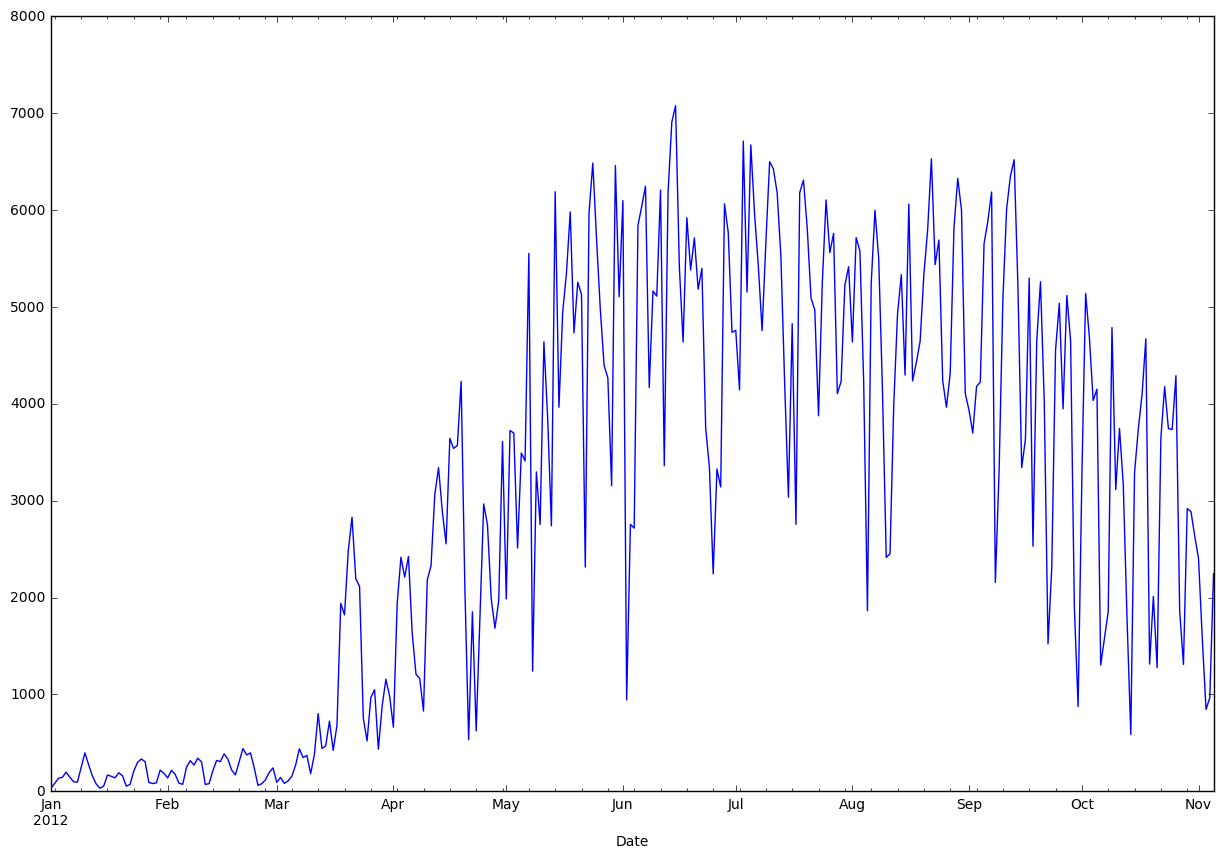

In [12]:
fixed_df['Berri 1'].plot(figsize=(15, 10))

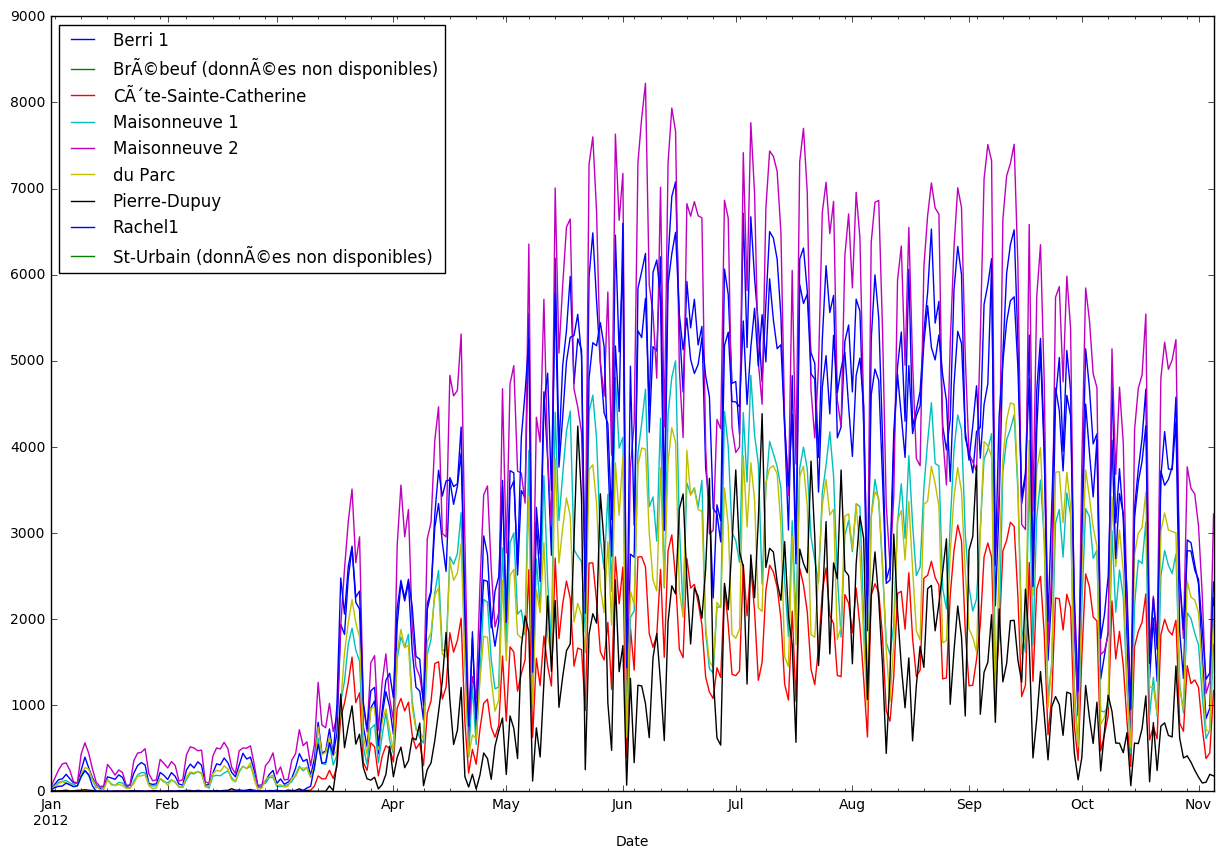

In [16]:
fixed_df.plot(figsize=(15, 10))

## dataframe에 새로운 열을 추가하기

위 데이터에 요일열을 추가해 보겠습니다.

In [14]:
fixed_df.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name=u'Date', length=310, freq=None)

In [15]:
# 우선 위의 데이터는 read_cvs함수를 통해 index가 datetime으로 되어있고 잘 파싱되어 있습니다.
# 따라서 이렇게 날짜만 뽑아낼 수도 있고
fixed_df.index.day

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13

In [16]:
# 이렇게 요일별로 index를 뽑아낼 수 있습니다.
fixed_df.index.weekday

array([6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5,

In [17]:
# 이렇게 하면 월별로 index를 뽑아낼 수 있습니다.
fixed_df.index.month

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8

요일별로 자전거 이용을 얼마나하는지 한번 계산해보도록 하겠습니다.
우선 해당 데이터 프레임에 요일을 추가합니다.

In [18]:
fixed_df['weekday'] = fixed_df.index.weekday
fixed_df['month'] = fixed_df.index.month
fixed_df.head()

,Berri 1,BrÃ©beuf (donnÃ©es non disponibles),CÃ´te-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (donnÃ©es non disponibles),weekday,month
Date,,,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN,6,1
2012-01-02,83,NaN,1,68,153,53,6,43,NaN,0,1
2012-01-03,135,NaN,2,104,248,89,3,58,NaN,1,1
2012-01-04,144,NaN,1,116,318,111,8,61,NaN,2,1
2012-01-05,197,NaN,2,124,330,97,13,95,NaN,3,1


In [19]:
weekday_cnt = fixed_df.groupby('weekday').aggregate(sum)
month_cnt = fixed_df.groupby('month').aggregate(sum)
weekday_cnt

,Berri 1,BrÃ©beuf (donnÃ©es non disponibles),CÃ´te-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (donnÃ©es non disponibles),month
weekday,,,,,,,,,,
0,134298,NaN,60329,90051,163767,90184,46204,130130,NaN,253
1,135305,NaN,58708,92035,165880,91399,35167,120088,NaN,243
2,152972,NaN,67344,104891,186061,102103,43263,133088,NaN,245
3,160131,NaN,69028,111895,196715,105674,45385,140241,NaN,247
4,141771,NaN,56446,98568,172390,89872,42470,137255,NaN,248
5,101578,NaN,34018,62067,105060,48289,52861,112828,NaN,249
6,99310,NaN,36466,55324,98308,50004,61485,117150,NaN,252


In [20]:
month_cnt

,Berri 1,BrÃ©beuf (donnÃ©es non disponibles),CÃ´te-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (donnÃ©es non disponibles),weekday
month,,,,,,,,,,
1,4915,NaN,38,3308,7737,3088,160,1140,NaN,91
2,6712,NaN,51,4573,10226,4852,240,73,NaN,86
3,26229,NaN,11388,18194,35736,21487,6634,26437,NaN,96
4,67699,NaN,29137,49312,85786,46048,16195,71759,NaN,90
5,133274,NaN,54360,94224,154609,78355,50130,129590,NaN,90
6,144849,NaN,58826,95213,169227,86190,53043,146530,NaN,93
7,162562,NaN,59657,101969,182673,88010,80033,150703,NaN,91
8,149227,NaN,61589,95110,168556,84261,57583,137377,NaN,93
9,127061,NaN,57986,83540,147277,86611,42328,123757,NaN,95


In [21]:
weekday_cnt.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_cnt

,Berri 1,BrÃ©beuf (donnÃ©es non disponibles),CÃ´te-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (donnÃ©es non disponibles),month
Monday,134298,NaN,60329,90051,163767,90184,46204,130130,NaN,253
Tuesday,135305,NaN,58708,92035,165880,91399,35167,120088,NaN,243
Wednesday,152972,NaN,67344,104891,186061,102103,43263,133088,NaN,245
Thursday,160131,NaN,69028,111895,196715,105674,45385,140241,NaN,247
Friday,141771,NaN,56446,98568,172390,89872,42470,137255,NaN,248
Saturday,101578,NaN,34018,62067,105060,48289,52861,112828,NaN,249
Sunday,99310,NaN,36466,55324,98308,50004,61485,117150,NaN,252


In [22]:
data = weekday_cnt.drop(weekday_cnt.columns[[1,8,-1]], axis=1)
data.head()

,Berri 1,CÃ´te-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Monday,134298,60329,90051,163767,90184,46204,130130
Tuesday,135305,58708,92035,165880,91399,35167,120088
Wednesday,152972,67344,104891,186061,102103,43263,133088
Thursday,160131,69028,111895,196715,105674,45385,140241
Friday,141771,56446,98568,172390,89872,42470,137255


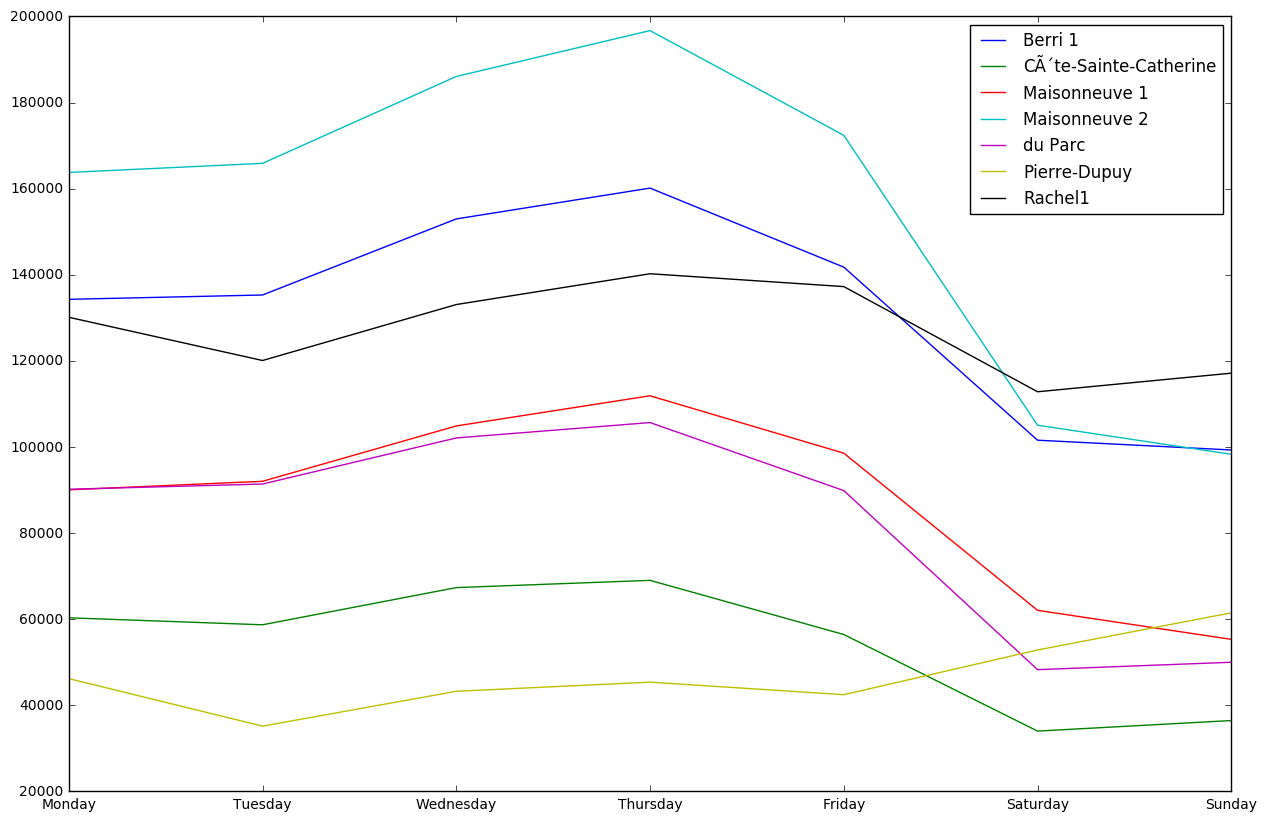

In [23]:
data.plot(figsize=(15, 10))

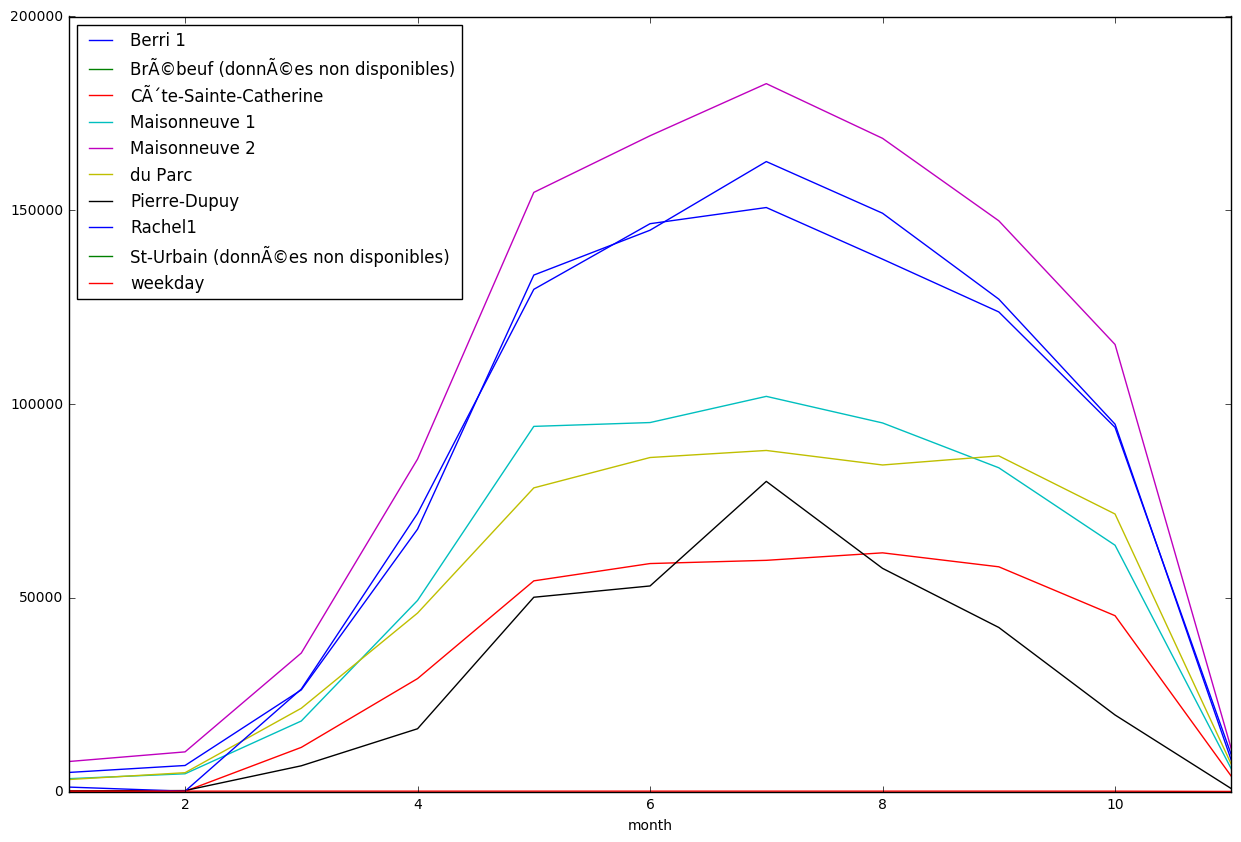

In [24]:
month_cnt.plot(figsize=(15, 10))

In [25]:
dt = data.T
dt['Sunday'].plot(kind='bar',figsize=(150, 100))

In [26]:
# cvs로
data.to_csv('bike_data.csv', encoding='utf8', index=True)
# excel로
data.to_excel('bike_data.xls',encoding='utf8', index=True)
# txt로
data.to_csv('bike_data.text',encoding='utf8', index=True)